#Model Demand for Bike Sharing 

###About Dataset
####Overview
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.


#Data information
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* Weather -
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

###Importing libs

In [105]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [106]:
#Loading Api from kaggle for dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [107]:
#Downloading data from kaggle
!kaggle competitions download -c bike-sharing-demand

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [108]:
#As data downloaded in zip file we need to unzip it
import zipfile
zip_ref = zipfile.ZipFile('/content/bike-sharing-demand.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

###Looking into the Data

In [109]:
#Reading the data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample =pd.read_csv('/content/sampleSubmission.csv')
df = train.copy()
test_df = test.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


####Here all the variables or features are numeric and the target variable that we have to predict is the (COUNT) variable. hence this is a typical example of a regression problem as the count variable is continuous varied.

In [110]:
#Lets check data 
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [111]:
#test data
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [112]:
#Lets Check data types for train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [113]:
#Lets check data types for test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [114]:
df.shape #shape of train data

(10886, 12)

In [115]:
test_df.shape # shape of test data

(6493, 9)

In [116]:
#checking null values in train data
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [117]:
test_df.isnull().sum() #Checking null values in test data

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [118]:
#data description of train
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [119]:
test_df.describe() #for test data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [120]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [121]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [122]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

# Data Pre-Processing

In [123]:
#Lets convert date time column to each new elements ex(year,month,day,weekday,hours)
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])
print(train['datetime'].dtype)
print(test['datetime'].dtype)

datetime64[ns]
datetime64[ns]


In [124]:
#Creating function 
def split_date(df):
#Lets add year ex 2011,2012
  df['year']=df['datetime'].apply(lambda t:t.year)
#Lets add months
  df['month']=df['datetime'].apply(lambda t:t.month)
#Lets add date
  df['day']=df['datetime'].apply(lambda t:t.day)
#Lets add weekday
  df['dayofweek']=df['datetime'].apply(lambda t:t.dayofweek)
#And lastly hours
  df['hour']=df['datetime'].apply(lambda t:t.hour)
#Hence now we dont need the previous column as we extracted all info from it 
#So lets drop it
  df.drop(columns=['datetime'],inplace=True)

  return df

In [125]:
train['datetime'].dt.month.value_counts()

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: datetime, dtype: int64

In [126]:
train['datetime'].dt.day.value_counts()

1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: datetime, dtype: int64

In [127]:
train['datetime'].dt.year.value_counts()

2012    5464
2011    5422
Name: datetime, dtype: int64

In [128]:
#Lets make split datetime col into new cols for train & test data
train = split_date(train)
test = split_date(test)


In [129]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


* After extracting all the info from datetime .Col of Dayofweek contain:- Monday=0, Sunday=6

In [130]:
#Lets check average bikes rented on hour  
train.groupby('hour').agg({'count':'mean'}).reset_index().sort_values(by='count',ascending=False)

,hour,count
17,17,468.765351
18,18,430.859649
8,8,362.769231
16,16,316.372807
19,19,315.278509
13,13,257.787281
12,12,256.508772
15,15,254.298246
14,14,243.442982
20,20,228.517544


##EDA

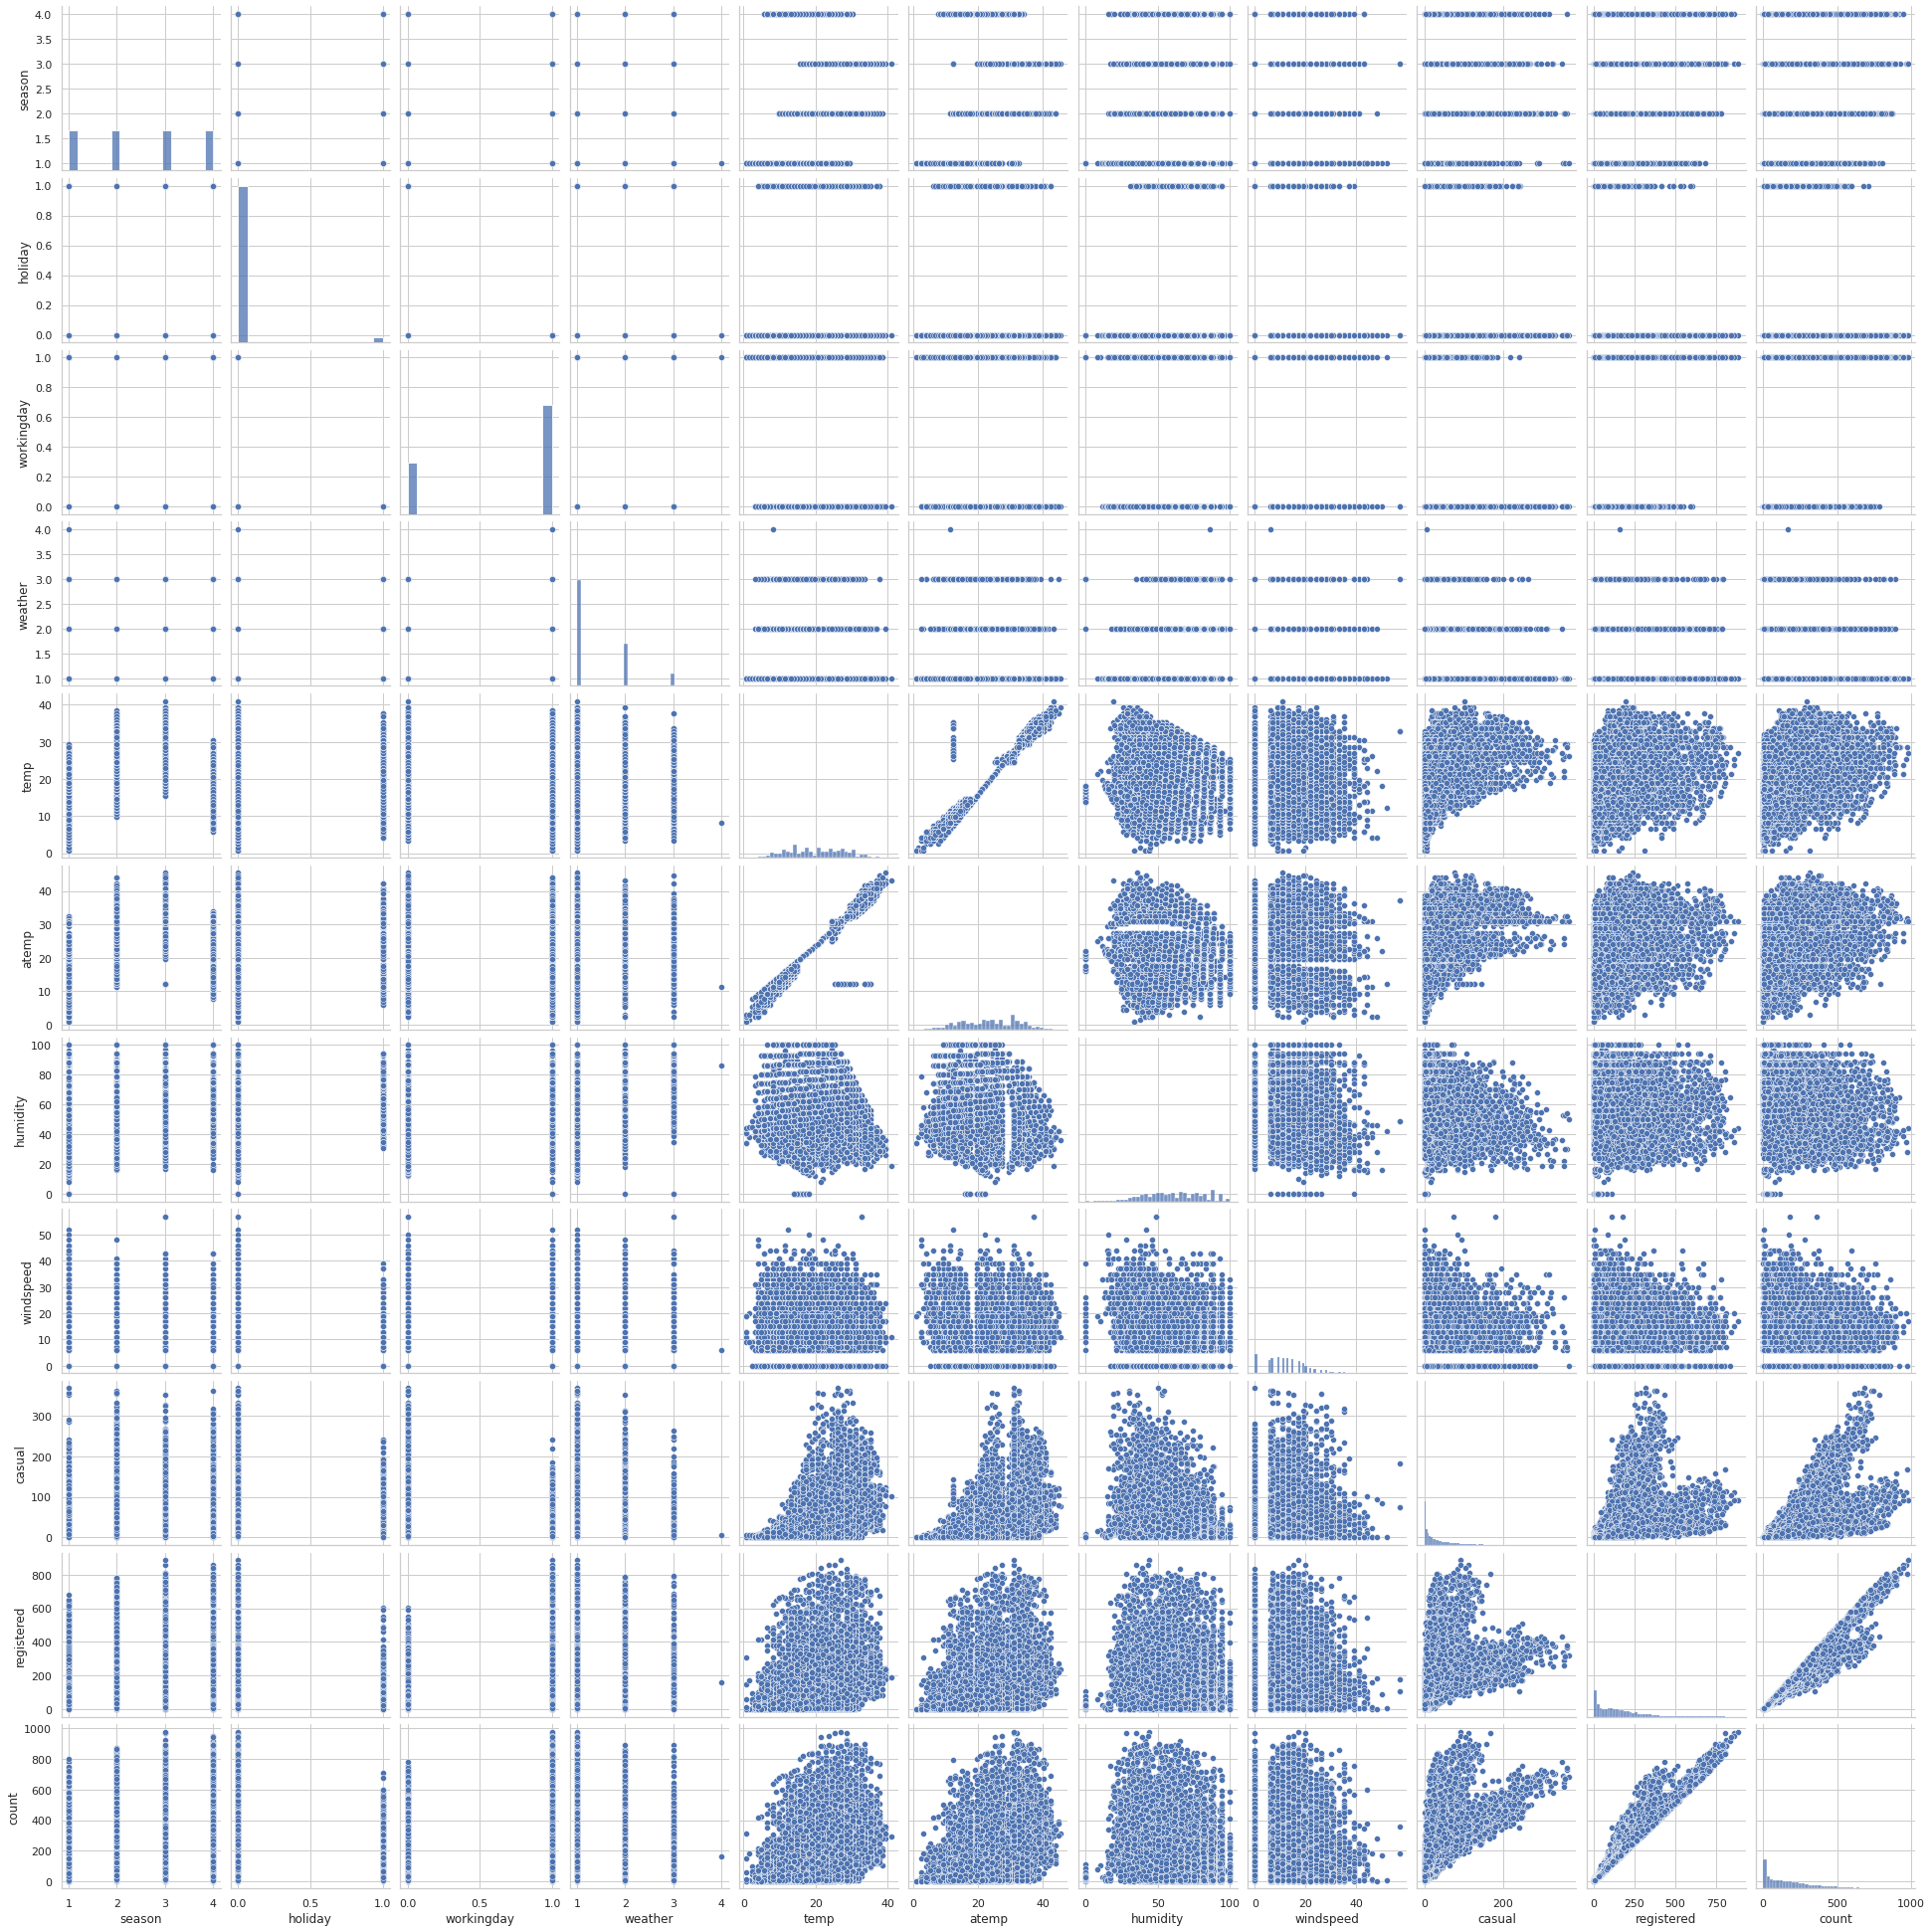

In [131]:
sns.pairplot(df)
plt.show()

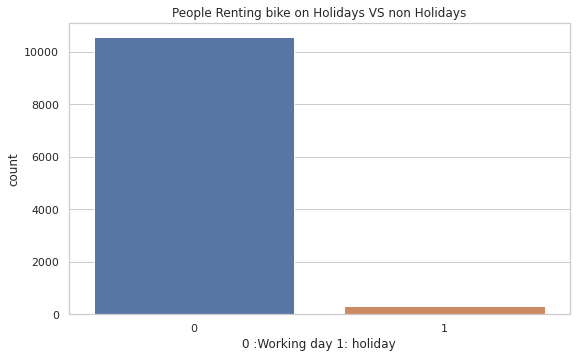

In [132]:
plt.rcParams['figure.figsize']=8,5
sns.countplot(x=df['holiday'])
plt.title('People Renting bike on Holidays VS non Holidays')
plt.xlabel('0 :Working day 1: holiday')
plt.show()

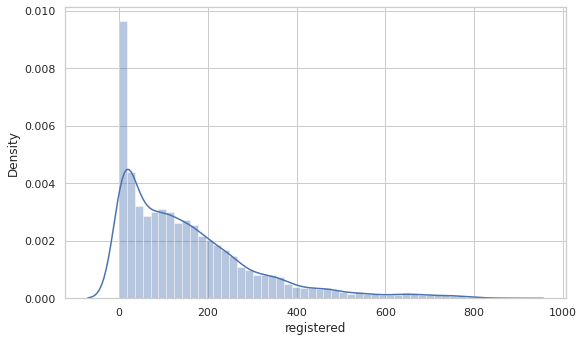

In [133]:
sns.distplot(df['registered'])
plt.show()

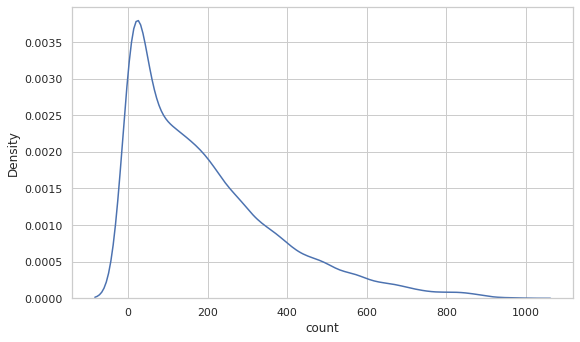

In [134]:
sns.kdeplot(df['count'])
plt.show()

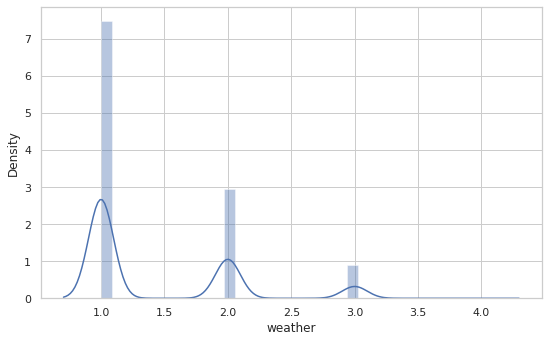

In [135]:
sns.distplot(df['weather'])
plt.show()

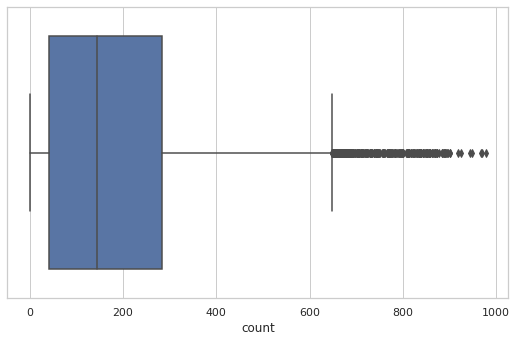

In [136]:
sns.boxplot(df['count'])
plt.show()

* As we can see there are outliers in count column will deal it in further steps

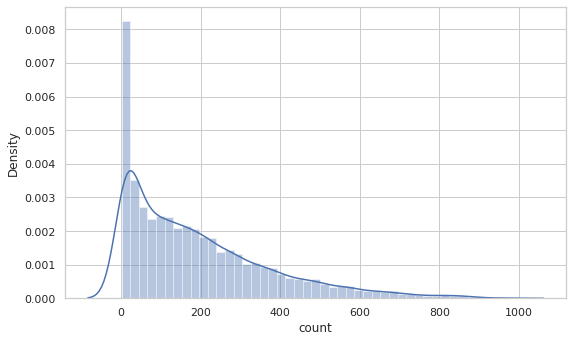

In [137]:
sns.distplot(df['count'])
plt.show()

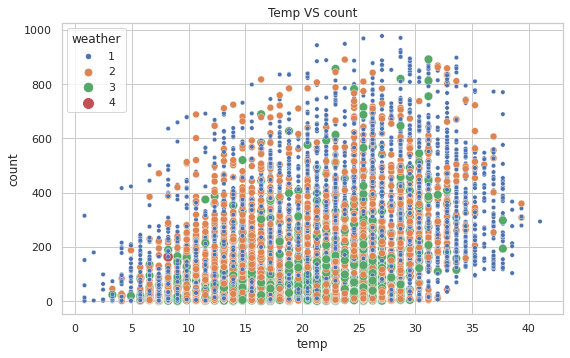

In [138]:
sns.scatterplot(data=df,x='temp',y='count',hue='weather',size='weather',palette="deep",sizes=(20, 100))
plt.title('Temp VS count')
plt.show()

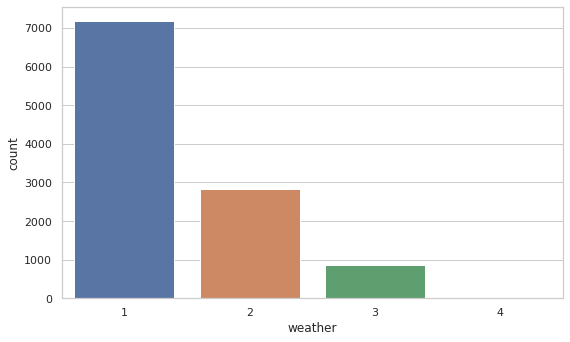

In [139]:
sns.countplot(df['weather'])
plt.show()

* Weather 1 (Spring ) has the higest bikes rented 

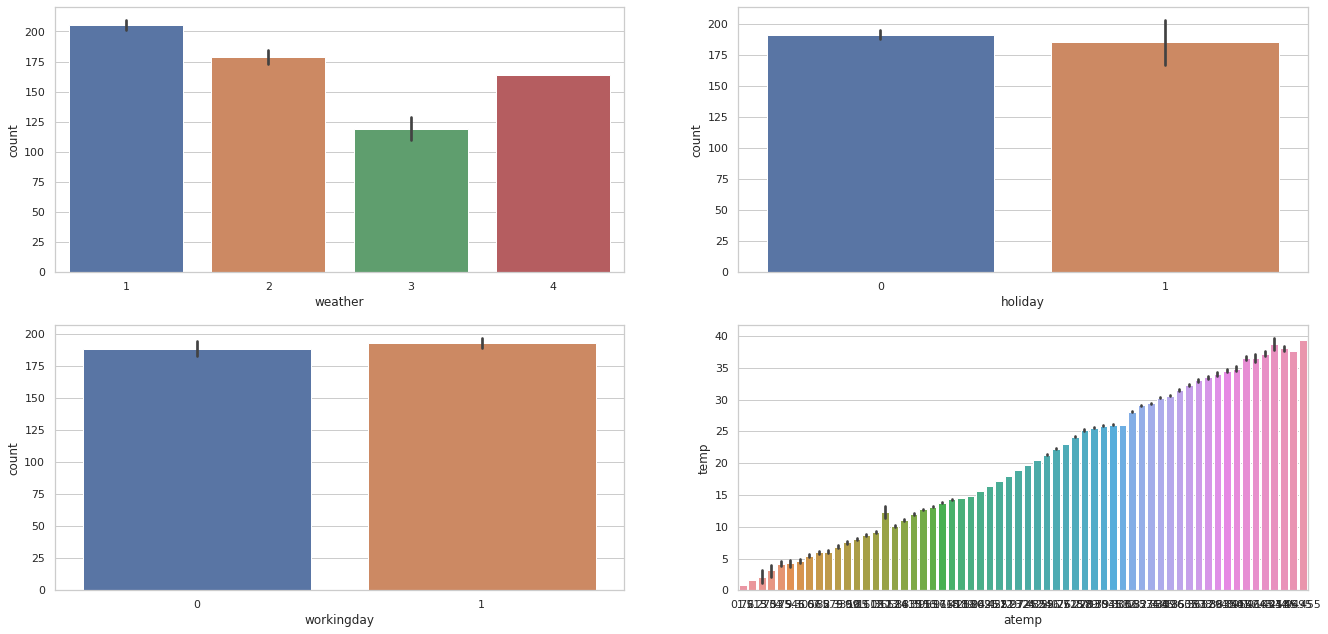

In [140]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)

sns.barplot(df['weather'],df['count'],ax=axes[0][0])
sns.barplot(df['holiday'],df['count'],ax=axes[0][1])
sns.barplot(df['workingday'],df['count'],ax=axes[1][0])
sns.barplot(df['atemp'],df['temp'],ax=axes[1][1])
plt.show()

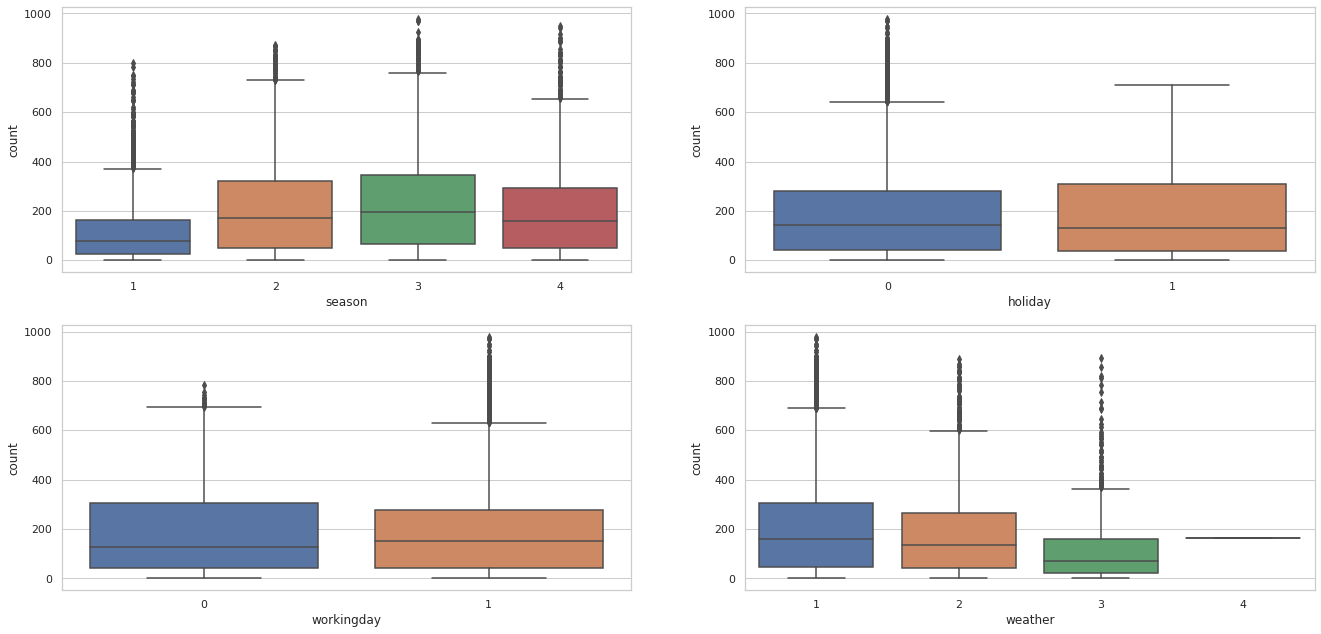

In [144]:
#Box plot between count & categorical features
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)

sns.boxplot(data=df,y='count',x='season',ax=axes[0][0])
sns.boxplot(data=df,y='count',x='holiday',ax=axes[0][1])
sns.boxplot(data=df,y='count',x='workingday',ax=axes[1][0])
sns.boxplot(data=df,y='count',x='weather',ax=axes[1][1])
plt.show()

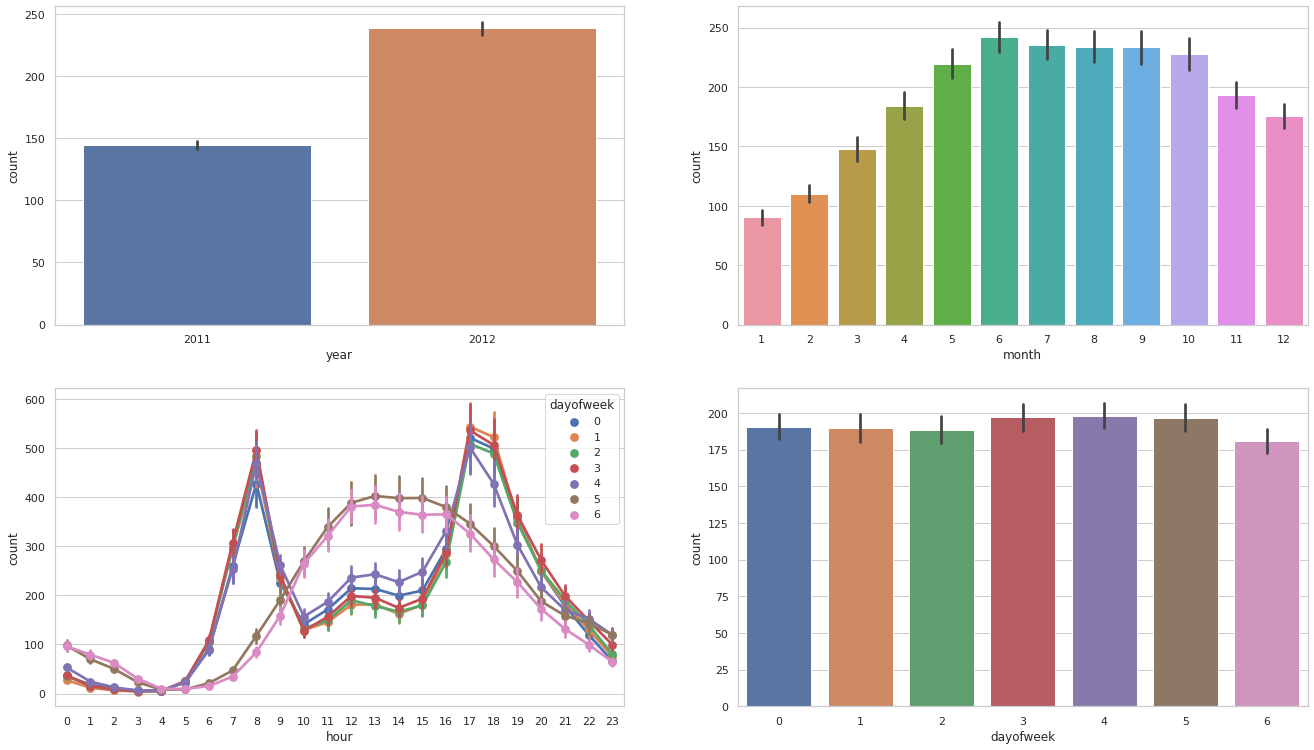

In [145]:
#Lets plot between categorical and numerical feautures
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,12)
sns.barplot(data=train,x='year',y='count',ax=axes[0][0])
sns.barplot(data=train,x='month',y='count',ax=axes[0][1])
sns.pointplot(data=train,x='hour',y='count',hue='dayofweek',ax=axes[1][0])
sns.barplot(data=train,x='dayofweek',y='count',ax=axes[1][1])
plt.show()

* As we can see in year 2012 was having most rental for bikes as compare to 2011
* Most of the bikes were rented on July & also on Aug,Sept,Oct.
* Jan,Feb,March has the lesser Bike rentals as compare to other months
* Most of bike rented on weekday are Thur,Fri,Sat
* For hour we can see in evening there are high demand for bikes everyday as in early morning also there are high demand but less as compare to evening!
* Col of Dayofweek contain:- Monday=0... Sunday=6

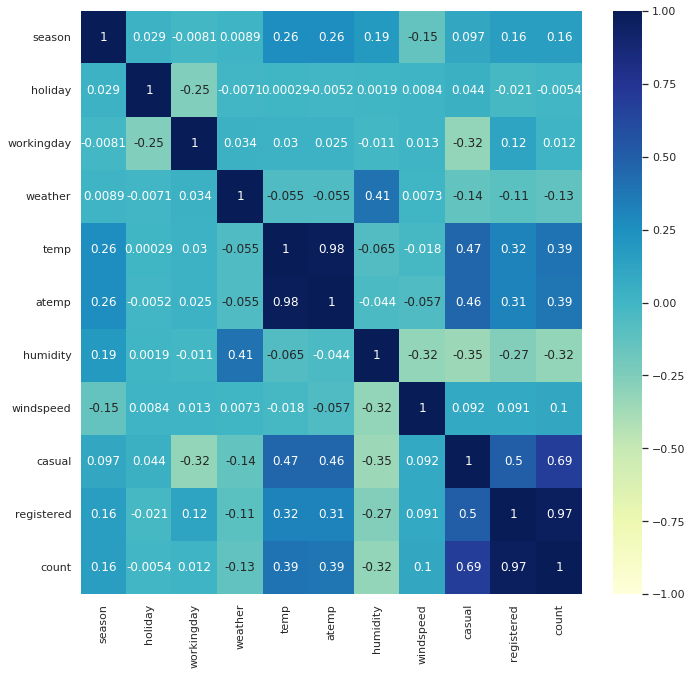

In [146]:
#Coreleation between each features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr('pearson'),vmin=-1,vmax=1,annot=True,cmap="YlGnBu")
plt.show()

* As we can see there is high corelation between casual and registered coloumn but  i think its only in numbers not in logical as understood( count = casual + registered )Hence we can drop it. 
* For Holiday there is negative coreleation that means there are less holidays &  more bikes rented same for humidity too

In [147]:
#Dropping Columns
train = train.drop(columns=['casual','registered'])

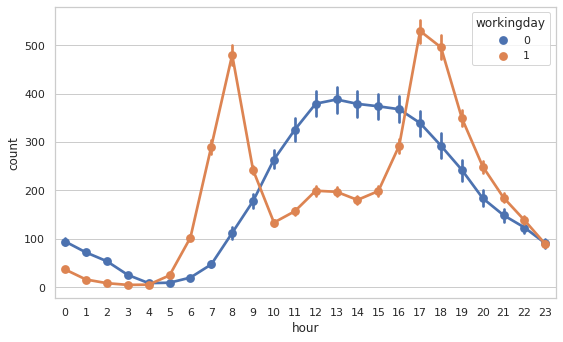

In [148]:
#Plotting to check for working non working day
sns.pointplot(x=train["hour"], y=train["count"],
             hue=train["workingday"], data=train)
plt.show()

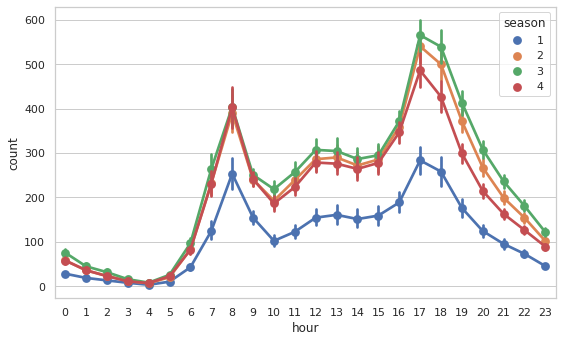

In [149]:
#Lets check Season ,count & hour  
sns.pointplot(x=train["hour"], y=train["count"],
             hue=train["season"], data=train)
plt.show()

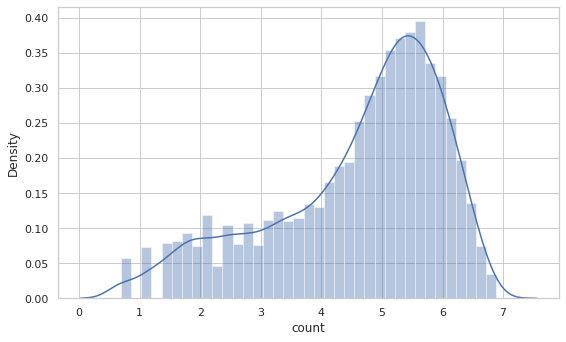

In [150]:
#count col is not normally distributed lets use log for making it normal distribution.
train['count']=np.log1p(train['count'])
sns.distplot(train['count'])
plt.show()

In [151]:
# Eliminate outliers (with residual less than stdev*3)
train=train[np.abs(train[ 'count'])-train['count'].mean() <=(3*train['count'].std())]

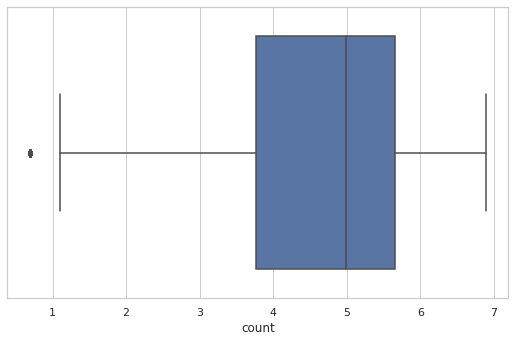

In [152]:
sns.boxplot(train['count'])
plt.show()

##Lets Scale the Data

In [153]:
# Standard Scaling numeric columns
from sklearn.preprocessing import MinMaxScaler
def scaling(df):
  scaler=MinMaxScaler()
  num_cols=['temp', 'atemp','humidity', 'windspeed']
  df[num_cols]=scaler.fit_transform(df[num_cols])
  return df

In [154]:
sc_train = scaling(train)
sc_test = scaling(test)

In [155]:
sc_train.head() #lets afterscaled how data it looks like

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.224490,0.305068,0.81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,0.204082,0.288064,0.80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,0.204082,0.288064,0.80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,0.224490,0.305068,0.75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,0.224490,0.305068,0.75,0.0,0.693147,2011,1,1,5,4


##Split the Data

In [156]:
#Lets Split the data in x ,y
y = sc_train[['count']]
x = sc_train.drop(columns=['count'])

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8164, 13), (2722, 13), (8164, 1), (2722, 1))

###Building Models

In [158]:
Models = {
    "LR":LinearRegression(),
    "KNNR":KNeighborsRegressor(),
    "SVR":SVR(),
    "RF":RandomForestRegressor(n_estimators=625,random_state=143),
    "GBR":GradientBoostingRegressor(n_estimators=4000,alpha=0.01,random_state=143),
    "BR":BaggingRegressor(),
    "ABR":AdaBoostRegressor()
  }

for name, model in Models.items():
    print(f"Using Model: {name}" )
    model.fit(x_train,y_train)
    print(f'Training Score: {model.score(x_train,y_train)}')
    print(f'Test Score: {model.score(x_test,y_test)}')
    Validate_Predictions = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, Validate_Predictions ))}') 
    print(f'r2_score:{r2_score(y_test,Validate_Predictions)}')
    print('*'*50)


Using Model: LR
Training Score: 0.49020715857812003
Test Score: 0.4802692188648161
RMSE: 1.019673028740276
r2_score:0.4802692188648161
**************************************************
Using Model: KNNR
Training Score: 0.9451762047057876
Test Score: 0.9163272146425723
RMSE: 0.4091323550384485
r2_score:0.9163272146425723
**************************************************
Using Model: SVR
Training Score: 0.0027185304787263886
Test Score: 0.005413296782702526
RMSE: 1.4105647836857835
r2_score:0.005413296782702526
**************************************************
Using Model: RF
Training Score: 0.9937964142931555
Test Score: 0.9576467205875019
RMSE: 0.29108192227391
r2_score:0.9576467205875019
**************************************************
Using Model: GBR
Training Score: 0.982656166776049
Test Score: 0.9584326001983511
RMSE: 0.28836871481735027
r2_score:0.9584326001983511
**************************************************
Using Model: BR
Training Score: 0.9901118096375994
Test Score

#Conclusion
* If we dont deal with the outliers it doesnt not affect much for the model it was just change of 0.01% in RandomForestRegressor & GradientBoostingRegressor 
* As we can see RandomForestRegressor(RF) & GradientBoostingRegressor(GBR) has the lowest RMSE of 0.29 & 0.28.